In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, make_scorer,average_precision_score
from sklearn.metrics import plot_confusion_matrix

In [ ]:
df=pd.read_csv("/content/Complete_Clinical.csv")

In [ ]:
df.head()

,Age,Gender,Date of Onset of symptoms,Fever/chills,Sore throat,General weakness,Breathlessness,Headache,Cough,COPD,Hypertension,Asthma,Heart disease,Diabetes,ICU,Duration,Outcome
0,47.0,Male,Symptomatic,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,0,0,0
1,48.0,Male,Asymptomatic,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Present,0,0,0
2,30.0,Male,Asymptomatic,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,0,0,0
3,25.0,Male,Asymptomatic,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,0,0,0
4,21.0,Male,Symptomatic,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,0,0,0


In [ ]:
df['Outcome'].value_counts()

0    6895
1     168
Name: Outcome, dtype: int64

In [ ]:
df.columns

Index(['Age', 'Gender', 'Date of Onset of symptoms', 'Fever/chills',
       'Sore throat', 'General weakness', 'Breathlessness', 'Headache',
       'Cough', 'COPD', 'Hypertension', ' Asthma', 'Heart disease', 'Diabetes',
       'ICU', 'Duration', 'Outcome'],
      dtype='object')

In [ ]:
sns.histplot(df['Fever/chills'])
plt.title('Gender Distribution')
plt.show()

KeyError: ignored

In [ ]:
df[" Asthma"].unique()

array(['Absent', 'Present ', 'Present'], dtype=object)

In [ ]:
df["Age"]=(df["Age"]-min(df["Age"]))/(max(df["Age"])-min(df["Age"]))

In [ ]:
df.rename(columns={'Date of Onset of symptoms':'Symptom'},inplace=True)
df.rename(columns={'Fever/chills':'Fever'},inplace=True)
#df.rename(columns={'Outcome ':'Outcome'},inplace=True)
df.rename(columns={' Asthma':'Asthma'},inplace=True)

In [ ]:
df['Gender'] = df['Gender'].str.upper()
#df['Current_Status'] = df['Current_Status'].str.upper()
df['Symptom'] = df['Symptom'].str.upper()
df['Fever'] = df['Fever'].str.upper()
df['Sore throat'] = df['Sore throat'].str.upper()
df['General weakness'] = df['General weakness'].str.upper()
df['Breathlessness'] = df['Breathlessness'].str.upper()
df['Headache'] = df['Headache'].str.upper()
df['Cough'] = df['Cough'].str.upper()
df['COPD'] = df['COPD'].str.upper()
df['Hypertension'] = df['Hypertension'].str.upper()
df['Heart disease'] = df['Heart disease'].str.upper()
df['Diabetes'] = df['Diabetes'].str.upper()
df['Asthma'] = df['Asthma'].str.upper()
#df['ICU'] = df['ICU'].str.upper()

In [ ]:
df.columns=df.columns.str.replace(' ','')

In [ ]:
df['Gender'].replace(' ','',regex=True,inplace=True)
#df['Current_Status'].replace(' ','',regex=True,inplace=True)
df['Symptom'].replace(' ','',regex=True,inplace=True)
df['Fever'].replace(' ','',regex=True,inplace=True)
df['Sorethroat'].replace(' ','',regex=True,inplace=True)
df['Generalweakness'].replace(' ','',regex=True,inplace=True)
df['Breathlessness'].replace(' ','',regex=True,inplace=True)
df['Headache'].replace(' ','',regex=True,inplace=True)
df['Cough'].replace(' ','',regex=True,inplace=True)
df['COPD'].replace(' ','',regex=True,inplace=True)
df['Hypertension'].replace(' ','',regex=True,inplace=True)
df['Asthma'].replace(' ','',regex=True,inplace=True)
df['Heartdisease'].replace(' ','',regex=True,inplace=True)
df['Diabetes'].replace(' ','',regex=True,inplace=True)

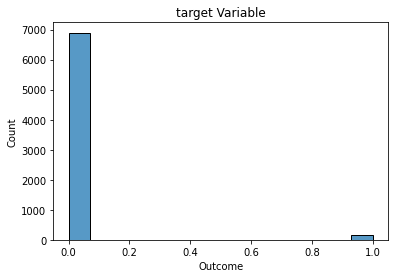

In [ ]:
sns.histplot(df['Outcome'])
plt.title('target Variable')
plt.show()

In [ ]:
df['Fever'].unique()

array(['ABSENT', 'PRESENT'], dtype=object)

In [ ]:
df.head()

,Age,Gender,Symptom,Fever,Sorethroat,Generalweakness,Breathlessness,Headache,Cough,COPD,Hypertension,Asthma,Heartdisease,Diabetes,ICU,Duration,Outcome
0,0.477834,MALE,SYMPTOMATIC,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,0,0,0
1,0.488072,MALE,ASYMPTOMATIC,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,PRESENT,0,0,0
2,0.303778,MALE,ASYMPTOMATIC,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,0,0,0
3,0.252585,MALE,ASYMPTOMATIC,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,0,0,0
4,0.211631,MALE,SYMPTOMATIC,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Fever'] = labelencoder.fit_transform(df['Fever'])
df['Hypertension'] = labelencoder.fit_transform(df['Hypertension'])
df['Diabetes'] = labelencoder.fit_transform(df['Diabetes'])
df['Symptom'] = labelencoder.fit_transform(df['Symptom'])

In [ ]:
data=df
data.drop('ICU',axis=1,inplace=True)
data.drop('Duration',axis=1,inplace=True)

Text(0.5, 1.0, 'Pearson Correlation')

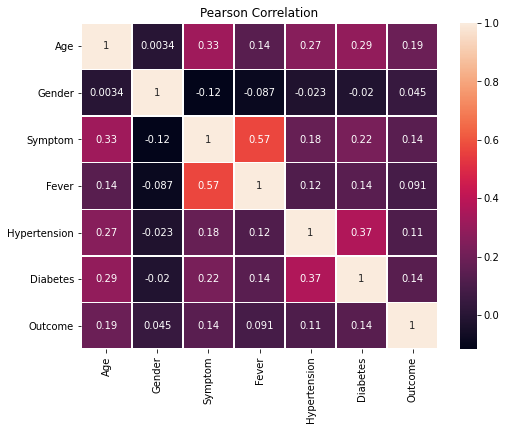

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
plt.title("Pearson Correlation")

In [ ]:
df

,Age,Gender,Symptom,Fever,Sorethroat,Generalweakness,Breathlessness,Headache,Cough,COPD,Hypertension,Asthma,Heartdisease,Diabetes,ICU,Duration,Outcome
0,0.477834,MALE,SYMPTOMATIC,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,0,0,0
1,0.488072,MALE,ASYMPTOMATIC,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,PRESENT,0,0,0
2,0.303778,MALE,ASYMPTOMATIC,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,0,0,0
3,0.252585,MALE,ASYMPTOMATIC,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,0,0,0
4,0.211631,MALE,SYMPTOMATIC,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7058,0.314017,FEMALE,SYMPTOMATIC,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,0,15,0
7059,0.242347,FEMALE,SYMPTOMATIC,PRESENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,0,1,0
7060,0.273062,FEMALE,SYMPTOMATIC,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,0,2,0
7061,0.252585,FEMALE,SYMPTOMATIC,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,ABSENT,0,16,0


In [ ]:
df.columns=df.columns.str.replace(' ','')
df.columns

Index(['Age', 'Gender', 'Symptom', 'Fever', 'Sorethroat', 'Generalweakness',
       'Breathlessness', 'Headache', 'Cough', 'COPD', 'Hypertension', 'Asthma',
       'Heartdisease', 'Diabetes', 'ICU', 'Duration', 'Outcome'],
      dtype='object')

In [ ]:
X=df.drop(["ICU","Duration","Outcome"],axis=1).copy()

In [ ]:
X.shape

(7063, 14)

In [ ]:
y=df["Outcome"].copy()

In [ ]:
X_encoded=pd.get_dummies(X,columns=['Gender',
                                    'Symptom',
                                    'Fever',
                                    'Sorethroat','Generalweakness','Breathlessness','Headache',
                                    'Cough','COPD','Hypertension','Asthma','Heartdisease','Diabetes'])

In [ ]:
X_encoded.head()

,Age,Gender_FEMALE,Gender_MALE,Symptom_ASYMPTOMATIC,Symptom_ASYMTOMATIC,Symptom_SYMPTOMATIC,Fever_ABSENT,Fever_PRESENT,Sorethroat_ABSENT,Sorethroat_PRESENT,Generalweakness_ABSENT,Generalweakness_PRESENT,Breathlessness_ABSENT,Breathlessness_PRESENT,Headache_ABSENT,Headache_PRESENT,Cough_ABSENT,Cough_PRESENT,COPD_ABSENT,COPD_PRESENT,Hypertension_ABSENT,Hypertension_PRESENT,Asthma_ABSENT,Asthma_PRESENT,Heartdisease_ABSENT,Heartdisease_PRESENT,Diabetes_ABSENT,Diabetes_PRESENT
0,0.477834,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,0.488072,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
2,0.303778,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,0.252585,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4,0.211631,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42,test_size=0.15,stratify=y)

In [ ]:
clf_xgb=xgb.XGBClassifier()

In [ ]:
clf_xgb.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='auc',eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.744155
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.740657
[2]	validation_0-auc:0.741507
[3]	validation_0-auc:0.743729
[4]	validation_0-auc:0.743053
[5]	validation_0-auc:0.74344
[6]	validation_0-auc:0.744618
[7]	validation_0-auc:0.822667
[8]	validation_0-auc:0.845275
[9]	validation_0-auc:0.842164
[10]	validation_0-auc:0.842473
[11]	validation_0-auc:0.844019
[12]	validation_0-auc:0.842628
[13]	validation_0-auc:0.843981
[14]	validation_0-auc:0.843517
[15]	validation_0-auc:0.844271
[16]	validation_0-auc:0.845391
[17]	validation_0-auc:0.843014
[18]	validation_0-auc:0.8463
[19]	validation_0-auc:0.846338
[20]	validation_0-auc:0.845874
[21]	validation_0-auc:0.863865
[22]	validation_0-auc:0.868097
[23]	validation_0-auc:0.868986
[24]	validation_0-auc:0.869604
[25]	validation_0-auc:0.871614
[26]	validation_0-auc:0.871729
[27]	validation_0-auc:0.872
[28]	validation_0-auc:0.86715
[29]	validation_0-auc:0.866377
[30]	validation_0-auc:0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

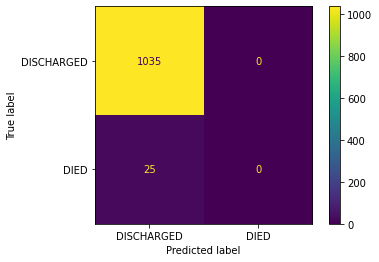

In [ ]:
plot_confusion_matrix(clf_xgb,X_test,y_test,values_format='d',display_labels=["DISCHARGED","DIED"])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=4,class_weight='balanced_subsample')
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
pred=clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86      1035
           1       0.08      0.88      0.14        25

    accuracy                           0.75      1060
   macro avg       0.54      0.82      0.50      1060
weighted avg       0.97      0.75      0.84      1060



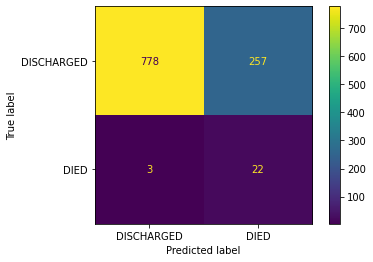

In [ ]:
plot_confusion_matrix(clf,X_test,y_test,values_format='d',display_labels=["DISCHARGED","DIED"])

In [ ]:
from skopt import BayesSearchCV

In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 102kB 4.0MB/s 


In [ ]:
import skopt
print('skopt %s' % skopt.__version__)

skopt 0.8.1


In [ ]:
from numpy import mean
from numpy import std

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
# from skopt import BayesSearchCV

In [ ]:
params = dict()
params['max_depth'] = ([3,4,5,6,7,8,9])
params['gamma'] = (1e-6, 100.0, 'log-uniform')
#params['reg_lambda'] = (1e-6, 100.0, 'log-uniform')
params['scale_pos_weight'] = ([5,8,10,15,20,25,30,40])
# params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the search
clf_xgb=xgb.XGBClassifier()
# search = BayesSearchCV(estimator=clf_xgb, search_spaces=params, n_jobs=-1, cv=cv,scoring='roc_auc')
# # perform the search
# search.fit(X_train, y_train)
# report the best result
# print(search.best_score_)
# print(search.best_params_)

In [ ]:
clf_xgb=xgb.XGBClassifier(gamma=92,max_depth=9,scale_pos_weight=40)
clf_xgb.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='auc',eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.864541
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.873391
[2]	validation_0-auc:0.885604
[3]	validation_0-auc:0.878145
[4]	validation_0-auc:0.882145
[5]	validation_0-auc:0.880908
[6]	validation_0-auc:0.880754
[7]	validation_0-auc:0.880348
[8]	validation_0-auc:0.879111
[9]	validation_0-auc:0.873739
[10]	validation_0-auc:0.876155
[11]	validation_0-auc:0.876444
[12]	validation_0-auc:0.874357
Stopping. Best iteration:
[2]	validation_0-auc:0.885604



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=92,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=40, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred=clf_xgb.predict(X_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      5860
           1       0.10      0.92      0.19       143

    accuracy                           0.81      6003
   macro avg       0.55      0.86      0.54      6003
weighted avg       0.98      0.81      0.88      6003



In [ ]:
pred=clf_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87      1035
           1       0.08      0.84      0.15        25

    accuracy                           0.77      1060
   macro avg       0.54      0.80      0.51      1060
weighted avg       0.97      0.77      0.85      1060



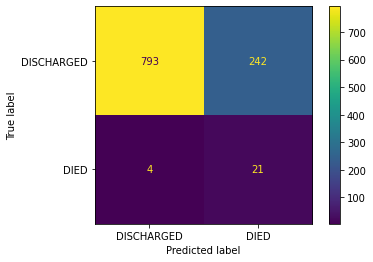

In [ ]:
plot_confusion_matrix(clf_xgb,X_test,y_test,values_format='d',display_labels=["DISCHARGED","DIED"])

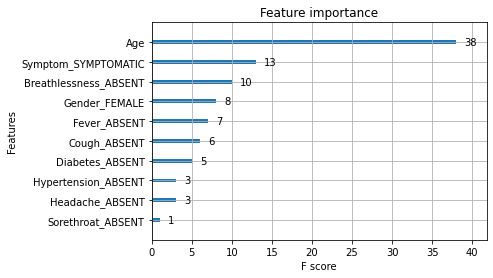

In [ ]:
from xgboost import plot_importance
plot_importance(clf_xgb)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
bayes_cv_tuner = BayesSearchCV(
        estimator = xgb.XGBClassifier(
        objective = 'binary:logistic',
        eval_metric = 'auc'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        # 'min_child_weight': (0, 10),
        'max_depth': ([3,4,5,6,8,10]),
        # 'max_delta_step': (0, 20),
        # 'subsample': (0.01, 1.0, 'uniform'),
        # 'colsample_bytree': (0.01, 1.0, 'uniform'),
        # 'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-3, 1000, 'log-uniform'),
        # 'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-3, 0.5, 'log-uniform'),
        # 'min_child_weight': (0, 5),
        # 'n_estimators': (50, 100),
        'scale_pos_weight': ([3,5,10,15,20])
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = -1,
    # n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

In [ ]:
bayes_cv_tuner.fit(X_train, y_train)
# report the best result
print(bayes_cv_tuner.best_score_)
print(bayes_cv_tuner.best_params_)

ValueError: ignored